<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>

</center>

# Projet Recherche et Innovation, par Eva Marques, Aleksi Timonen, et Solange Pruilh
# Tuteur : M. Philippe Besse

# Première Partie : 
## A-Reconnaissance de caractères manuscrits (MNIST)  en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-Learn"/></a>

In [1]:
# Graphiques dans la fenêtre
%matplotlib inline

/usr/local/Canopy_64bit/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [3]:
# Lecture des données d'apprentissage
path="" # Si les données osnt dans le répertoire courant sinon:
#path="http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
Dtrain=pd.read_csv(path+"mnist_train.csv",header=None)
Dtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [4]:
# Dimensions de l'échantillon
Dtrain.shape

(60000, 785)

In [5]:
# Extraction puis suppression de la dernière colonne des labels
Ltrain=Dtrain.iloc[:,784]
Dtrain.drop(Dtrain.columns[[784]], axis=1,inplace=True)
Dtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Même chose pour les données de test
Dtest=pd.read_csv(path+"mnist_test.csv",header=None)
Ltest=Dtest.iloc[:,784]
Dtest.drop(Dtest.columns[[784]], axis=1,inplace=True)
Dtest.shape

(10000, 784)

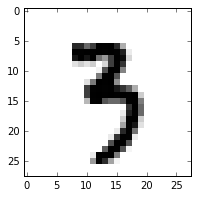

In [7]:
# affichage d'un chiffre
plt.figure(1, figsize=(3, 3))
plt.imshow(np.matrix(Dtest.iloc[1,:]).reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [8]:
#importation des outils sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix


## $K$ plus proches voisins

In [67]:
# Définition du modèle avec un nombre k "standard" de voisins
tps1 = time.clock()
knn = KNeighborsClassifier(n_neighbors=15,n_jobs=-1)
digit_knn=knn.fit(Dtrain, Ltrain) 
tps2 = time.clock()
print("Temps définition du modèle k-nn avec 15 voisins:",(tps2 - tps1)/60)

Temps de k-nn : 0.4080154110763639


In [ ]:
# Estimation de l'erreur de prévision sur l'échantillon test
tps1 = time.clock()
erreur=1-digit_knn.score(Dtest,Ltest)
tps2 = time.clock()
print("Temps d'apprentissage sur échantillon test:",(tps2 - tps1)/60,"Erreur:",erreur)

Temps: 4.144379219830413 Erreur: 0.0367


On utilise maintenant la validation croisée pour optimiser les paramètres, c'est à dire le nombre de voisins.

In [ ]:
# Application pour la validation croisée

param_grid=[{"n_neighbors":list(range(5,11))}] ### test sur le nombre de voisins optimal
val_croisee = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,n_jobs=-1)

val_croiseeOpt=val_croisee.fit(Dtrain,Ltrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - val_croiseeOpt.best_score_,val_croiseeOpt.best_params_))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=val_croiseeOpt.best_params_["n_neighbors"])
digit_knn=knn.fit(Dtrain, Ltrain)
# Estimation de l’erreur de prévision
1-digit_knn.score(Dtest,Ltest)
# Prévision
y_chap = digit_knn.predict(Dtest)
# matrice de confusion
table=pd.crosstab(Ltest,y_chap)
print(table)


On trouve que le nombre de voisins optimal est 7 pour une erreur de prévision de l'ordre de 3 % .

### Remarque : 
Le temps d'exécution de la validation croisée pour les k-plus proches voisins est très long. 

# Random Forest

In [8]:
tps0 = time.clock()
rf = RandomForestClassifier(n_estimators=100, 
   criterion='gini', max_depth=None, min_samples_split=2, 
   min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, 
   bootstrap=True, oob_score=True, n_jobs=-1,random_state=None, verbose=0)
rf.fit(Dtrain,Ltrain)
tps1 = time.clock()
print("Temps de configuration RF avec 100 arbres :" ,(tps1 - tps0)/60)

Temps de configuration RF avec 100 arbres : 2.5950667999999997


In [12]:
# erreur out-of-bag
erreur_oob=1-rf.oob_score_
tps2 = time.clock()

print("Temps d'execution RF avec 100 arbres:", (tps2 - tps0)/60)
print("Erreur oob:", erreur_oob)

Temps d'execution RF avec 100 arbres: 2.620620133333333
Erreur oob: 0.0343166666667


In [10]:
# erreur sur l'échantillon test
print ("Erreur sur l'echantillon test:", 1-rf.score(Dtest,Ltest))

Erreur sur l'echantillon test: 0.0296


## Optimisation de l'erreur out-of-bag par variation du nombres d'arbres

In [8]:
erreur_oob=np.zeros(13)
x=np.linspace(200,800,13,dtype=np.int16)
array_erreur=np.zeros(13)
for i in range(13) :
    tps0 = time.clock()
    rf = RandomForestClassifier(n_estimators=x[i], criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_leaf_nodes=None,  bootstrap=True, oob_score=True, n_jobs=-1,random_state=None, verbose=0)
    rf.fit(Dtrain,Ltrain)
    tps1 = time.clock()
    
    print("Temps de configuration RF pour  ",x[i],"arbres :" ,(tps1 - tps0)/60)
    # erreur out-of-bag
    erreur_oob[i]=1-rf.oob_score_
    # erreur sur l'échantillon test
    array_erreur[i]=1-rf.score(Dtest,Ltest)

Temps de configuration RF pour   200 arbres : 2.2596347666666667
Temps de configuration RF pour   250 arbres : 2.8940652833333336
Temps de configuration RF pour   300 arbres : 3.4279459500000002
Temps de configuration RF pour   350 arbres : 4.007220266666667
Temps de configuration RF pour   400 arbres : 4.520629983333333
Temps de configuration RF pour   450 arbres : 5.049873633333334
Temps de configuration RF pour   500 arbres : 5.697774500000003
Temps de configuration RF pour   550 arbres : 6.260032283333332
Temps de configuration RF pour   600 arbres : 6.72453131666667
Temps de configuration RF pour   650 arbres : 7.4060887000000015
Temps de configuration RF pour   700 arbres : 7.868698916666661
Temps de configuration RF pour   750 arbres : 8.584115766666665
Temps de configuration RF pour   800 arbres : 9.127237199999998


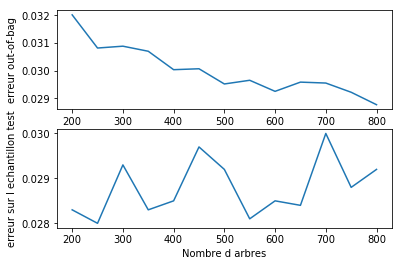

In [9]:
plt.figure(1)
plt.subplot(2,1,1)
#graphe des erreurs out of bag en fonction du nombre d'arbres
plt.plot(x,erreur_oob)
plt.xlabel('Nombre d arbres')
plt.ylabel('erreur out-of-bag')

plt.subplot(2,1,2)
#graphe des erreurs sur l'échantillon test en fonction du nombre d'arbres
plt.plot(x,array_erreur)
plt.xlabel('Nombre d arbres')
plt.ylabel('erreur sur l echantillon test')

Plus le nombre d'arbres augmente, plus l'erreur out-of-bag diminue, ce qui est normal car plus le nombre d'arbres est grand, plus le modèle est ajusté. 
L'erreur sur l'échantillon test permet de déterminer plus objectivement le nombre d'arbre optimal. 
Remarquons qu'à chaque simulation, les graphes évoluent, c'est pourquoi ce choix est assez empirique. On pourrait mettre en place une méthode de Monte Carlo pour trouver la meilleure valeur du paramètre, mais cela prendrait beaucoup trop de temps. 

Mais l'erreur out-of-bag reste de l'ordre 2,9% environ.

## Optimisation de l'erreur out-of-bag par variation de max_features

In [8]:
x2=np.linspace(2,32,10,dtype=np.int16)
print (x2)

[ 2  5  8 12 15 18 22 25 28 32]


In [9]:
erreur_oob2=np.zeros(10)
array_erreur2=np.zeros(10)
x2=np.linspace(2,32,10,dtype=np.int16)
temps_exec=np.zeros(10)
print ("L'algorithme RandomForest est ici exécuté avec un nombre d'arbres fixé à 500.")
for i in range(10) :
    tps0 = time.clock()
    rf = RandomForestClassifier(n_estimators=500, 
       criterion='gini', max_depth=None, min_samples_split=2, 
       min_samples_leaf=1, max_features=x2[i], max_leaf_nodes=None, 
       bootstrap=True, oob_score=True, n_jobs=-1,random_state=None, verbose=0)
    rf.fit(Dtrain,Ltrain)
    tps1 = time.clock()

    # erreur out-of-bag
    erreur_oob2[i]=1-rf.oob_score_
    tps2 = time.clock()
    temps_exec[i]=(tps2 - tps0)/60
    
    # erreur sur l'échantillon test
    array_erreur2[i]=1-rf.score(Dtest,Ltest)


L'algorithme RandomForest est ici exécuté avec un nombre d'arbres fixé à 500.


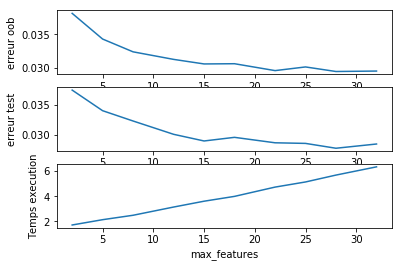

In [12]:
plt.figure(2)
plt.subplot(3,1,1)
#graphe des erreurs out of bag en fonction du nombre de max_features
plt.plot(x2,erreur_oob2)
plt.xlabel('Max_features')
plt.ylabel('erreur oob')

plt.subplot(3,1,2)
#graphe des erreurs sur l'échantillon test en fonction du nombre de max_features
plt.plot(x2,array_erreur2)
plt.xlabel('max_features')
plt.ylabel('erreur test')

plt.subplot(3,1,3)
#graphe du temps d'exécution en fonction du nombre de max_features
plt.plot(x2,temps_exec)
plt.xlabel('max_features')
plt.ylabel('Temps execution')

In [13]:
tps0 = time.clock()
rf = RandomForestClassifier(n_estimators=500, 
   criterion='gini', max_depth=None, min_samples_split=2, 
   min_samples_leaf=1, max_features='log2', max_leaf_nodes=None, 
   bootstrap=True, oob_score=True, n_jobs=-1,random_state=None, verbose=0)
rf.fit(Dtrain,Ltrain)
tps1 = time.clock()
print("Temps de configuration RF pour 500 arbres et max_features = log2:" ,tps1 - tps0)

Temps de configutration RF pour 500 arbres et max_features = log2: 157.46322099999998


In [15]:
# erreur out-of-bag
erreur_oob=1-rf.oob_score_
tps2 = time.clock()
print("Temps execution RF :", tps2 - tps0, "Erreur oob:", erreur_oob)
print("Erreur sur échantillon test :", 1-rf.score(Dtest,Ltest))

Temps execution RF : 160.76007200000004 Erreur oob: 0.0316833333333
Erreur sur échantillon test : 0.0311


Avec max_features valant $log_2 (n\_features)$ l'erreur out-of-bag n'est pas meilleure. On garde donc $max\_features=\sqrt{n\_features}$.

In [16]:
tps0 = time.clock()
rf = RandomForestClassifier(n_estimators=500, 
   criterion='gini', max_depth=None, min_samples_split=2, 
   min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, 
   bootstrap=True, oob_score=True, n_jobs=-1,random_state=None, verbose=0)
rfFit=rf.fit(Dtrain,Ltrain)
tps1 = time.clock()
print("Temps de configuration RF :" ,tps1 - tps0)
# erreur out-of-bag
erreur_oob=1-rf.oob_score_
tps2 = time.clock()
print("Temps execution RF :", tps2 - tps0, "Erreur oob:", erreur_oob)
print("Erreur sur échantillon test :", 1-rf.score(Dtest,Ltest))

Temps de configutration RF : 336.94610999999986
Temps execution RF : 336.9470299999998 Erreur oob: 0.0297
Erreur sur échantillon test : 0.0283


In [19]:
# prévision de l'échantillon test
y_chap = rfFit.predict(Dtest)
# matrice de confusion
table=pd.crosstab(y_chap,Ltest)
print("Matrice de confusion :")
print(table)

Matrice de confusion :
784      0     1    2    3    4    5    6    7    8    9
row_0                                                   
0      970     0    6    0    1    3    5    1    4    5
1        0  1124    0    0    0    0    3    3    0    6
2        0     2  999    8    1    0    1   18    6    2
3        0     3    6  977    0    9    0    1    7   10
4        0     0    2    0  959    3    3    1    2   11
5        2     2    0    5    0  864    4    0    5    4
6        2     2    4    0    5    6  938    0    3    1
7        1     0    9    9    0    1    0  992    4    3
8        4     1    6    7    2    5    4    3  932    5
9        1     1    0    4   14    1    0    9   11  962


# Réseaux de neurones

## Multi-layer Perceptron Classifier

In [9]:
from sklearn.preprocessing import StandardScaler  
# L'algorithme des réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(Dtrain)  
Dnet_train = scaler.transform(Dtrain)  
# Meme transformation sur le test
Dnet_test = scaler.transform(Dtest)

In [11]:
 ### test de nombres de neurones
tps0 = time.clock()
param_grid=[{"hidden_layer_sizes":list([(100,),(200,),(300,),(400,),(500,),(600,)])}]
nnet= GridSearchCV(MLPClassifier(max_iter=400),param_grid,cv=5,n_jobs=-1)

nnetOpt=nnet.fit(Dnet_train,Ltrain)
tps2 = time.clock()
print("Temps execution RF :", tps2 - tps0) 
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

('Temps execution RF :', 251.94206100000002)
Meilleur score = 0.026117, Meilleur paramètre = {'hidden_layer_sizes': (400,)}


In [12]:
# Estimation de l'erreur de prévision sur le test
erreur= 1-nnetOpt.score(Dnet_test,Ltest)
print ("Erreur : ", erreur)

('Erreur : ', 0.025000000000000022)


In [13]:
# prévision de l'échantillon test
y_chap = nnetOpt.predict(Dnet_test)
# matrice de confusion
table=pd.crosstab(y_chap,Ltest)
print(table)

784      0     1    2    3    4    5    6     7    8    9
row_0                                                    
0      971     1    6    0    2    2    3     0    2    4
1        1  1118    2    0    0    0    2     2    0    2
2        0     5  997    1    7    0    2    11    2    0
3        1     1    4  990    0    8    1     0   10    7
4        1     0    1    0  950    1    3     1    2    7
5        2     3    0    6    0  869    7     0    7    4
6        1     2    2    1    4    3  935     0    2    2
7        1     1    8    3    4    1    0  1003    3    5
8        2     4   11    5    2    7    5     1  944    5
9        0     0    1    4   13    1    0    10    2  973


On trouve le nombre optimal de neurones par validation croisée : 500. L'erreur de prévision est de 2.5%